In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [128]:
f_birth=pd.read_csv(r'c:\\Users\\mahen\\OneDrive\\Desktop\\datasets\\daily-total-female-births-CA.csv',index_col=[0],parse_dates=[0])

In [129]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [130]:
f_birth.size

365

In [131]:
type(f_birth)

pandas.core.frame.DataFrame

In [132]:
series_value=f_birth.values
series_value

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [133]:
type(series_value)

numpy.ndarray

In [134]:
f_birth.size

365

In [135]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [136]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='date'>

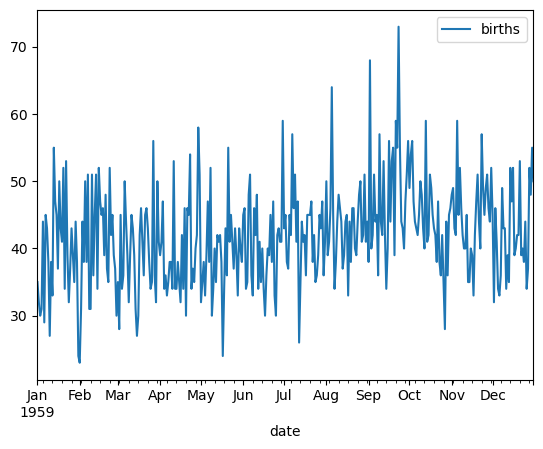

In [137]:
f_birth.plot()

In [138]:
f_birth_mean=f_birth.rolling(window=30).mean()

<AxesSubplot:xlabel='date'>

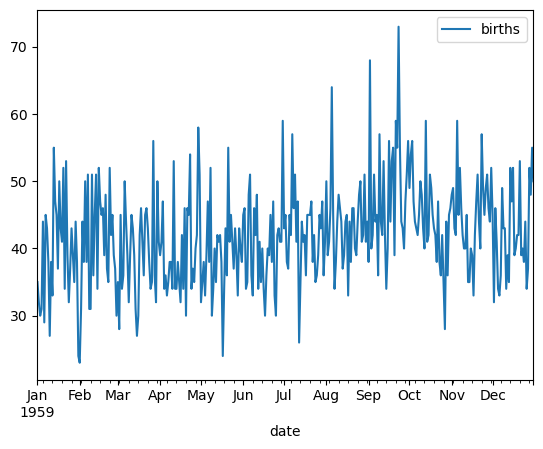

In [139]:
f_birth.plot()


<AxesSubplot:xlabel='date'>

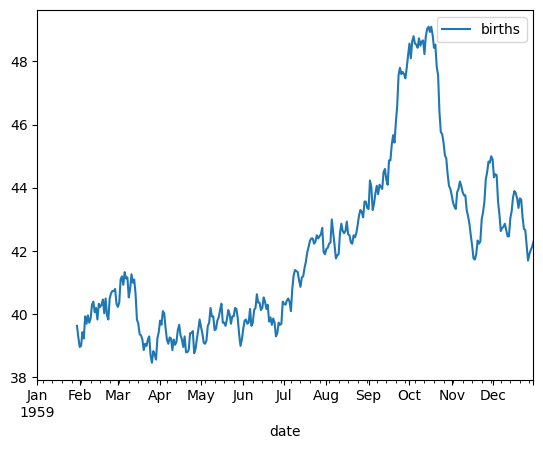

In [140]:
f_birth_mean.plot()

In [141]:
value=pd.DataFrame(series_value)

In [142]:
birth_df=pd.concat([value,value.shift(1)],axis=1)

In [143]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [144]:
birth_df.columns=['Actual_birth','Forecast_birth']

In [145]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [146]:
from sklearn.metrics import mean_squared_error

In [147]:
birth_test=birth_df[1:]

In [148]:
birth_test.head()

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [149]:
birth_test.tail()

,Actual_birth,Forecast_birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [150]:
birth_error=mean_squared_error(birth_test.Actual_birth,birth_test.Forecast_birth)

In [151]:
birth_error

84.22252747252747

In [152]:
np.sqrt(birth_error)

9.177283229394606

In [153]:
'''ARIMA-Autoregressive(p) Integrated(d) Moving Average(q)'''

'ARIMA-Autoregressive(p) Integrated(d) Moving Average(q)'

In [154]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [155]:
'''plot_acf is to identify parameter Q'''
#ARIMA(p,d,q)

'plot_acf is to identify parameter Q'

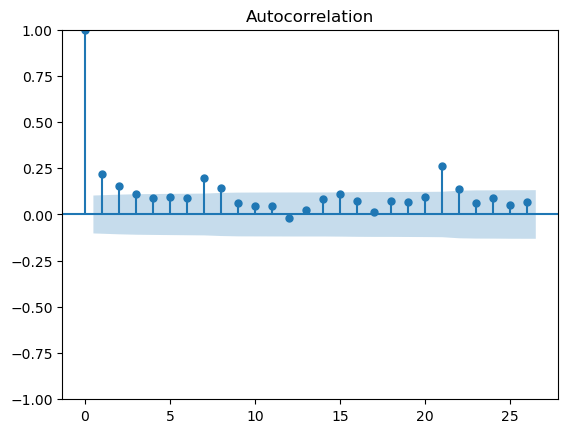

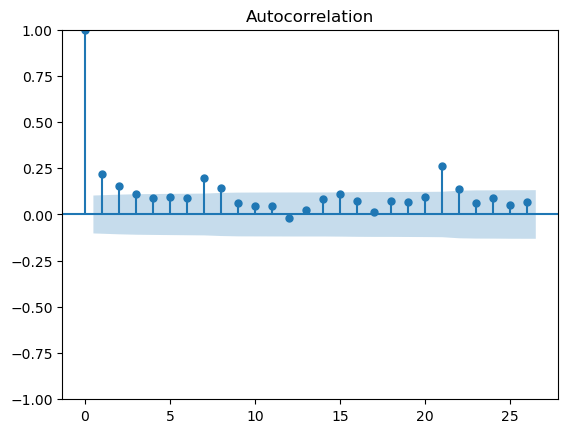

In [156]:
plot_acf(f_birth)

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


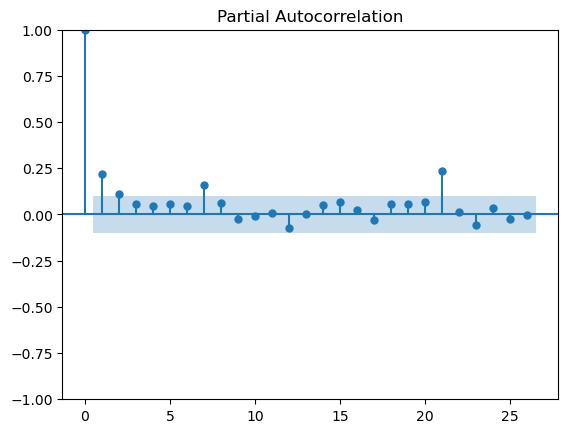

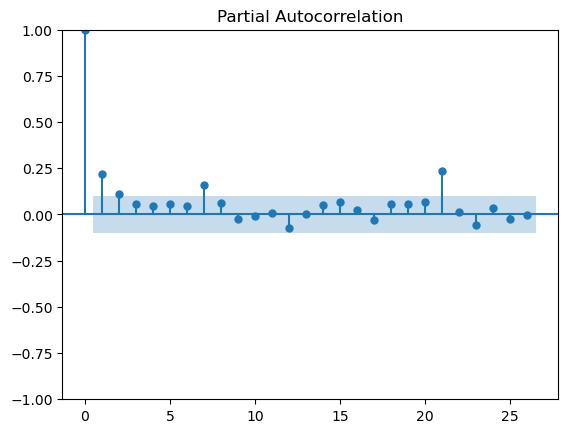

In [157]:
plot_pacf(f_birth) #to identify the value of p

In [158]:
#p=2,3 d=0, q=3,4
f_birth.size

365

In [159]:
birth_train=f_birth[0:330]
birth_test=f_birth[330:365]

In [160]:
birth_train.size

330

In [161]:
birth_test.size

35

In [164]:
from statsmodels.tsa.arima.model import ARIMA

In [165]:
birth_model=ARIMA(birth_train,order=(2,1,3))

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [166]:
birth_model_fit=birth_model.fit()

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [167]:
birth_model_fit.aic

2229.8541607505986

In [201]:
birth_forecast=birth_model_fit.forecast(steps=35)

In [202]:
birth_forecast

1959-11-27    45.006050
1959-11-28    44.973187
1959-11-29    44.560682
1959-11-30    44.723617
1959-12-01    44.439777
1959-12-02    44.647603
1959-12-03    44.410558
1959-12-04    44.621135
1959-12-05    44.407028
1959-12-06    44.609021
1959-12-07    44.410489
1959-12-08    44.601262
1959-12-09    44.415659
1959-12-10    44.595005
1959-12-11    44.421053
1959-12-12    44.589426
1959-12-13    44.426270
1959-12-14    44.584273
1959-12-15    44.431208
1959-12-16    44.579461
1959-12-17    44.435853
1959-12-18    44.574953
1959-12-19    44.440215
1959-12-20    44.570726
1959-12-21    44.444309
1959-12-22    44.566760
1959-12-23    44.448150
1959-12-24    44.563039
1959-12-25    44.451754
1959-12-26    44.559548
1959-12-27    44.455135
1959-12-28    44.556273
1959-12-29    44.458308
1959-12-30    44.553200
1959-12-31    44.461284
Freq: D, Name: predicted_mean, dtype: float64

In [204]:
birth_test

,births
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [205]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.6641025945731815